In [1]:
import numpy as np
import random

# Generate random numbers from a discrete uniform distribution (e.g., 1 to 6)..Eg:Rolling a die
def generate_discrete_uniform_numbers(low, high, size=10):
    return np.random.randint(low, high+1, size)


discrete_uniform_numbers = generate_discrete_uniform_numbers(1, 6, 10)
print("Discrete uniform random numbers:", discrete_uniform_numbers)

Discrete uniform random numbers: [5 4 1 3 1 2 6 4 1 5]


In [2]:
def true_random_numbers(size=5):
    return np.random.uniform(0, 1, size)

true_randoms = true_random_numbers(5)
print("True Random Numbers (Simulated):", true_randoms)

true_randoms = true_random_numbers(5)
print("True Random Numbers (Simulated):", true_randoms)

True Random Numbers (Simulated): [0.13474964 0.9157984  0.44952013 0.96329065 0.17413321]
True Random Numbers (Simulated): [0.10167131 0.9794676  0.18229919 0.77436288 0.79875554]


In [3]:

def pseudo_random_numbers(seed, size=5):
    random.seed(seed)
    return [random.random() for _ in range(size)]

size=5
seed=10


pseudo_randoms = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed:", pseudo_randoms)


pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed (Repeated):", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed: [0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732]
Pseudo-Random Numbers with Seed (Repeated): [0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732]


In [4]:
size=5
seed=12
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed=12:", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed=12: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795]


In [5]:
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)
print("Pseudo-Random Numbers with Seed=12 again:", pseudo_randoms_repeated)

Pseudo-Random Numbers with Seed=12 again: [0.4745706786885481, 0.6574725026572553, 0.6664104711248381, 0.14260035292536777, 0.01086044309006795]


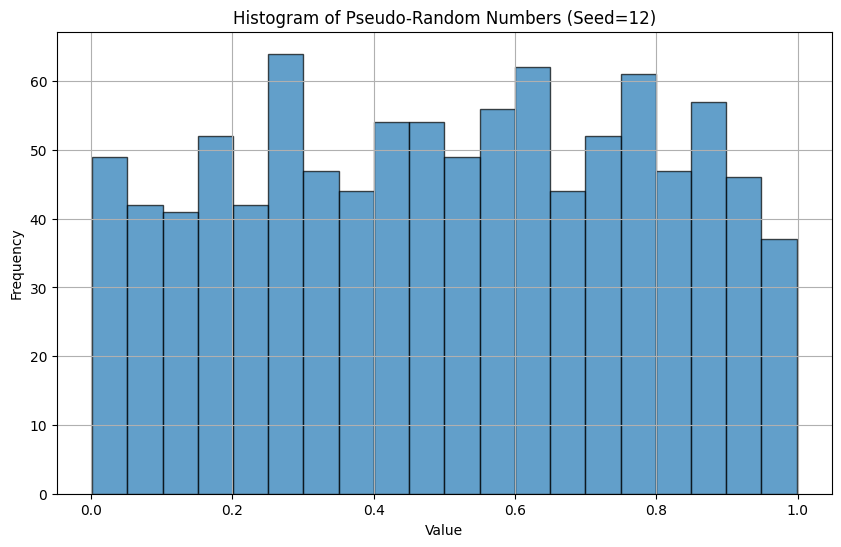

In [7]:


import matplotlib.pyplot as plt

true_randoms = true_random_numbers(1000)

plt.figure(figsize=(10, 6))
plt.hist(true_randoms, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Pseudo-Random Numbers (Seed=12)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

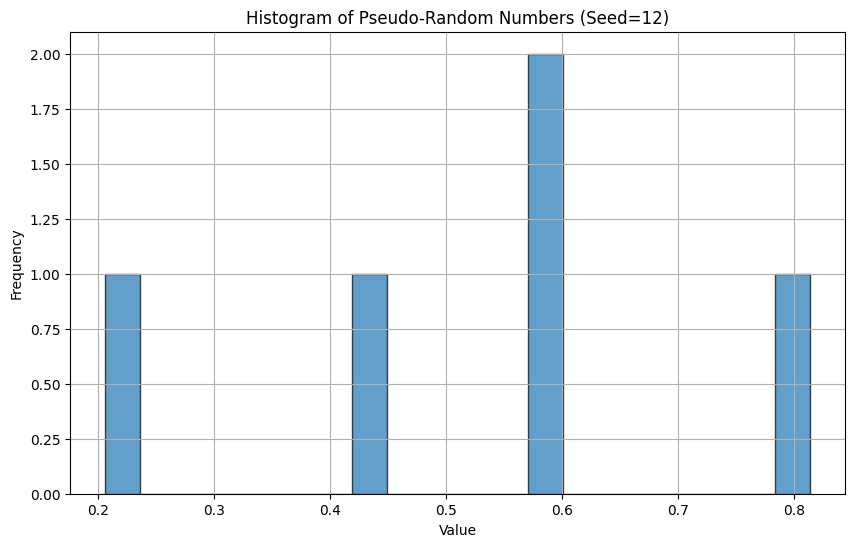

In [8]:
size=1000
seed=42
pseudo_randoms_repeated = pseudo_random_numbers(seed, size)

# Create a histogram to demonstrate uniformity
plt.figure(figsize=(10, 6))
plt.hist(pseudo_randoms, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Pseudo-Random Numbers (Seed=12)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_acceptance_rejection(alpha, size=2):
    variates = []

    for _ in range(size):
        n = 0
        P = 1
        print(f"Variate generation:")

        while True:
            R = np.random.uniform(0, 1)
            print(f"Generate random number R = {R:.4f}")
            P *= R
            print(f"  Update P = {P:.4f}")

            if P < np.exp(-alpha):
                variates.append(n)
                print(f"  P < exp(-alpha) ({P:.4f} < {np.exp(-alpha):.4f})")
                print(f"  Accept N = {n}")
                break
            else:
                n += 1
                print(f"  P >= exp(-alpha) ({P:.4f} >= {np.exp(-alpha):.4f})")
                print(f"  Reject N = {n-1}, increment n to {n}")

    return variates



In [10]:

alpha = 0.2
size = 5



print(f"Threshold (exp(-alpha)): {np.exp(-alpha):.4f}")

poisson_samples = poisson_acceptance_rejection(alpha, size)

print("\nGenerated Poisson Variates:")
print(poisson_samples)

Threshold (exp(-alpha)): 0.8187
Variate generation:
Generate random number R = 0.4844
  Update P = 0.4844
  P < exp(-alpha) (0.4844 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.8432
  Update P = 0.8432
  P >= exp(-alpha) (0.8432 >= 0.8187)
  Reject N = 0, increment n to 1
Generate random number R = 0.9348
  Update P = 0.7882
  P < exp(-alpha) (0.7882 < 0.8187)
  Accept N = 1
Variate generation:
Generate random number R = 0.0123
  Update P = 0.0123
  P < exp(-alpha) (0.0123 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.2097
  Update P = 0.2097
  P < exp(-alpha) (0.2097 < 0.8187)
  Accept N = 0
Variate generation:
Generate random number R = 0.4180
  Update P = 0.4180
  P < exp(-alpha) (0.4180 < 0.8187)
  Accept N = 0

Generated Poisson Variates:
[0, 1, 0, 0, 0]


Generated Poisson Variates:
[ 7  4  2  6  5  4  5  7  4  5  2  8  1  9  4  1  7  3  2  5  1  3  7  5
  8  4  6  9  6  6  4  3  5  9  4  9  0  5  6  5  4  7  7  4  3  2  4  5
  5  3  6  4  4  3  3  3  8  3  8  5  2  7  2  4  5  5  2  3  2  5  3  4
 12  4  4  7  8  8  5  7  2  5  9  8  7  0  5  4  3  4  4 10  3  7  9  4
  2  7  5  7  3  2  4  3  3  4  6  5  5  7  5  7  4  6  6  8  7  5 10  9
  4  6  2  6  8  4  2  4  3  9  3  3  4  3  6  5  5  3  3  5  4  8  6  4
  4  6  4  7  3  5  3  3  5  8  5  3  4  6  4  4  6  6  4  3  3  6  7  4
  3  7  8  4  1  7  8  2  5 10  9  6  7  2  2  3  3  3  7  7  5  8  3  3
  2  3  2  2  5  7  5 10  4  6  6  2  7  1  4  5  3  6  5  8  4  5  3  4
  9  4  5  3  6  8  2  3  5  7  3  8  3  5  2  3  9  3  2  2  8  7  5 10
  7  4  8  7  4  3  6  5  6  8  9  3  8  3  1  5  4  7  9  2  3  5  4  3
  8  5  4  6  6  2  7  5  2  5  3  7  7  5  3  0  6  2  3  3  3  7 10  6
  7  4  3  3  8  6  6  6  4  4  5  3  6  5  5  4  0  4  2  5  7  7  4  5
  8  3  7  1  0  5  5  

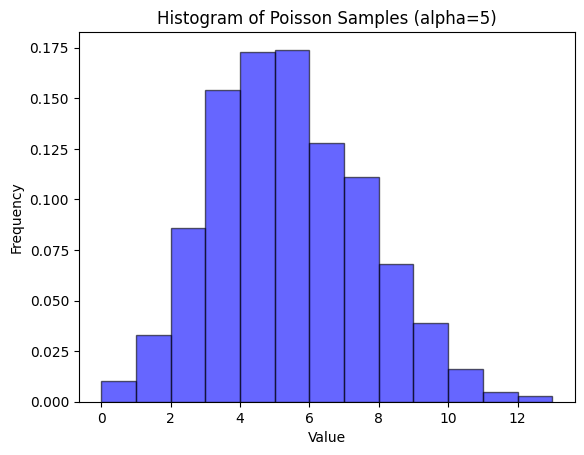

In [11]:
def poisson_acceptance_rejection(alpha, size=10):
    samples = []
    for _ in range(size):
        n = 0
        P = 1
        while True:
            R = np.random.uniform(0, 1)
            P *= R
            if P < np.exp(-alpha):
                samples.append(n)
                break
            n += 1
    return np.array(samples)


alpha = 5
size = 1000
poisson_samples = poisson_acceptance_rejection(alpha, size)




print("Generated Poisson Variates:")
print(poisson_samples)


def plot_histogram(samples, title, color='blue'):
    plt.hist(samples, bins=range(int(min(samples)), int(max(samples)) + 1), density=True, alpha=0.6, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


plot_histogram(poisson_samples, 'Histogram of Poisson Samples (alpha=5)')